# Linear Regression

This worksheet explores the concepts underlying linear regression, ie (i) projections into linear spaces, (ii) significance of features, (iii) a demonstration of LASSO, and a couple of examples of using linear regression on real datasets. 

In [45]:
import numpy as np
import numpy.random as npr

# For plotting

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


## Part 1: Geometry of Linear Regression

The geometry of linear regression is basic linear algebra from EE 345. Let us review a few necessary concepts, particularly regarding column spaces of matrices. It is also a good idea to review the four fundamental linear spaces associated with a matrix if you are not yet fully familiar with them.

Below, we will look at a matrix 
$$ X = \begin{bmatrix} 2 & 1 \\ -1 & 0 \\ 1 & 1 \end{bmatrix}.$$

The spaces essential to understand linear regression are the column space of $X$, $col(X)$, and its orthogonal complement, the null space of $X^T$, $null(X^T)$. The column space $col(X)$ is the set of all linear combinations of the two columns, and forms a plane in ${\mathbb R}^3$, the set of all vectors with 3 coordinates. This linear space is a 2-dimensional linear space (a plane) that we will draw below and focus on. The null space of $X^T$ is the set of all vectors perpendicular to every column of $X$ (or every row of $X^T$), \ie all the solutions of $X^T {\bf z} = 0$. This linear space will be a 1-dimensional linear space (a line) orthogonal to the column space, of $X$, and in the pictures below, it will be the line along the red vector.

The row space is the set of all linear combinations of the 3 rows, which turns out to ${\mathbb R}^2$. The null space of $X$ is trivial (ie contains just $\begin{bmatrix} 0\\0 \end{bmatrix}$). Incidentally, in high school, teachers would have explained the notion of linear regression from the row perspective. But this is not as useful in generalization, so we will only discuss this briefly in class in EE 345---that perspective is not present in this jupyter notebook.

[[0]
 [0]]


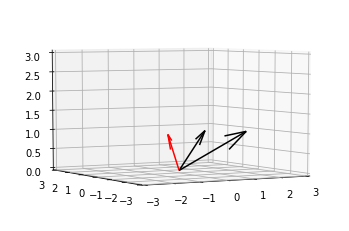

In [46]:
 # We now look at two vectors (2,-1,1) and (1,0,1)

u = np.array([[2, -1, 1],[1,0,1]])

# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
X, Y, Z = zip(*u)

print(u @ np.array([[-1],[-1],[1]]))

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'])
plt.quiver(*origin, -1, -1, 1,color=['red'])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(5,240)


### Column space

We will plot the set of all linear combinations of the two columns of $X$ in the code cell above. We should be getting a plane
of course, but let us do it and see for ourselves. If ${\bf u}_1$ is the vector in the first column of $X$, and ${\bf u}_2$
the vector in the second column of $X$, we will plot all vectors in the set
$$ \bigl\{  w_1 {\bf u}_1 + w_2 {\bf u}_2 : -2 \le w_1 \le 2 \textrm{ and } -2 \le w_2 \le 2 \bigr\}.$$
You can of course plot more points if you wish, but these should give us a pretty good idea.

A couple of points below. If we think of ${\bf u}_1$ and ${\bf u}_2$ as the column vectors, then verify that
$$ X\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}  = \begin{bmatrix} {\bf u}_1 & {\bf u}_2 \end{bmatrix} \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} = w_1 {\bf u}_1 + w_2 {\bf u}_2. $$
Our implementation will exploit this.

We will plot all the vectors of the set above as a surface. python requires that we arrange each of the x, y and z coordinates
of these points as a matrix, and the use of meshgrid and the particular array sizes below reflect that constraint.

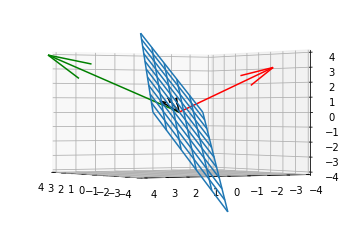

In [47]:
# the following creates a grid of 100*100 
# values in the rectangle with corners (-3,-3)
# (-3,3), (3,3) and (3,-3). The x co-ordinates
# of all the points are assigned to w1 (a 100x100 matrix), the
# y coordinates to w2 (another 100x100 matrix).

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

w1,w2 = np.meshgrid(x,y)

# we are eseentially looking at the linear combination
# of the rows of u for all coefficients -3 \le w1 \le 3
# (obtained by meshgrid above) and -3 \le w2 \le 3.

W = np.stack((w1,w2),axis=2)
ptsonplane = ( W @ u )

# ptsonplane is a 100x100 stack of 3 co-ordinate vectors. 
# The first, second and third coordinates are the x-, y-
# and z- coordinates respectively of the 100x100 points.

Xp = ptsonplane[:,:,0]
Yp = ptsonplane[:,:,1]
Zp = ptsonplane[:,:,2]

origin = [0],[0],[0]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Xp, Yp, Zp,rstride=20,cstride=10)
plt.quiver(*origin, X, Y, Z, color=['black','black'])

# We also plot the vector perpendicular to the plane: (1,1,-1) (scaled by -3 for better visualization)
# Note that this plane can be represented by (1,1,-1) dot w = 0.

plt.quiver(*origin, -3, -3, 3, color=['red'])

# Note that (1,1,-1) dot (-2, 5, 3) =0, so (-2,5,3) must lie on the plane as well. Sure enough it does.

plt.quiver(*origin, -2/4, 5/4, 3/4, color=['black'])
plt.quiver(*origin, 5,4,4, color=['green'])
ax.set_ylim([-4,4])
ax.set_xlim([-4,4])
ax.set_zlim([-4,4])

# Note from the view at this angle, the three black vectors are on the plane, the red and green are outside the plane.
ax.view_init(0,150)
plt.draw()

### Checking if a vector is in the column space

Checking if a vector $\bf y$ belongs to a column space of a matrix $X$ is another way to ask if $X{\bf w} = {\bf y}$ has a solutions (where the variables are $\bf w$). Recall from the previous cell that any linear combination of the columns of $X$ corresponds to $X{\bf w}$ for some vector $\bf w$, hence the connection.

Now we have the three vectors (2,-1,1), (1,0,1) and (-2, 5,3), all of which are on the plane (the black vectors). Rotate the picture from the code cell above if you cannot see them properly. We want to see if (5,4,4) (the green vector) can be written as a linear combination of these vectors. Equivalently, we ask if
$$ w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix} + w_3 \begin{bmatrix} -2 \\5\\3\end{bmatrix}$$
can ever equal (5,4,4) for some values of $w_1,w_2,w_3$. Of course, the vector (5,4,4) dot (1, 1, -1) != 0, so (5,4,4) 
does not lie on the plane above. Since any linear combination of the three vectors (2,-1,1), (1,0,1) and (-2, 5,3) can only lie on the blue plane and never ever leave it, we therefore conclude that no matter what values of $w_1,w_2, w_3$ we choose, we will not be able to represent (5,4,4) as the linear combination in the equation above.

Completely equivalent is asking if the following set of equations has a solution:

\begin{align*}
2 w_1 - 1 w_2 - 2 w_3 &= 5 \\
-1 w_1 + 0 w_2 + 5 w_3 &= 4 \\
 1 w_1 + 1 w_2 + 3 w_3 &= 4
\end{align*}

The answer again is no. 
 
If the right side of the last equation were changed to 9, we would have solutions---in fact, infinitely many of them. Explain why in a separate cell below.



### Projection into the column space

Since (5,4,4) does not lie in the linear space $col(X)$ (the blue plane in the pictures above), we look for the closest point in $col(A)$ to it. How?

Let the projection of the vector (5,4,4) onto the blue plane be ${\hat w}_1( 2,-1,1) + {\hat w}_2 (1,0,1)$ (we don't really need the third since any point on the plane is already a linear combination of the first two vectors). 

Now the error (column) vector 
$${\bf e} = \begin{bmatrix}5\\4\\4\end{bmatrix} - {\hat w}_1\begin{bmatrix} 2\\-1\\1\end{bmatrix} + {\hat w}_2 \begin{bmatrix}1\\0\\ 1\end{bmatrix}$$ 
must be perpendicular to the plane---ie, perpendicular to every point on the plane. How do we ensure that? We know every point on the plane is 
$$w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix}$$
for some two real numbers $w_1$ and $w_2$.
Therefore, if we just ensure that ${\bf e}$ is perpendicular to both (2,-1,1) and (1,0,1), we will then have for an arbitrary vector on the plane:
\begin{align*} 
{\bf e} \cdot &\Biggl( w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix}\Biggr) \\
&= w_1 {\bf e} \cdot \begin{bmatrix} 2\\-1\\1 \end{bmatrix} + w_2 {\bf e} \cdot \begin{bmatrix} 1\\0\\1\end{bmatrix}\\
&= 0 + 0
\end{align*}
where the last equality comes if we ensure ${\bf e}$ is perpendicular to both (2,-1,1) and (1,0,1).

So that is what we do. Recall 
$$X = \begin{bmatrix} 2 & 1 \\ -1 & 0\\ 1 & 1\end{bmatrix} \textrm{ and } {\bf y} = \begin{bmatrix} 5\\4\\4 \end{bmatrix}$$
We look for a vector $\hat {\bf w} = \begin{bmatrix}\hat w_1\\\hat w_2\end{bmatrix}$ such that the error ${\bf y} - X{\hat {\bf w}}$ satisfies
$$ = X^T ( {\bf y} - X{\hat {\bf w}}) = X^T {\bf e} = {\bf 0}. $$
This would then imply
$$(X^T X){\hat {\bf w}} = X^T{\bf y} \textrm{ or } \hat {\bf w} = (X^TX)^{-1} X^T {\bf y}.$$
Note then that the point closest to the plane, $X{\hat {\bf w}}$, is
$$ X\hat {\bf w} = X(X^TX)^{-1} X^T{\bf y}.$$

### Implementing the projection

The following two cells implement the projection operation we obtained in the cells above. The first approach computes the projection using matrix multiplication as noted above. The second uses the module LinearRegression from the scikit-learn package. Needless to say, the computations must match up in an ideal world (and they do in small examples like the above). But numerical errors due to roundoff may creep in large matrix computations, and it is therefore better to use the LinearRegression module which is more optimized than naive multiplication. If you really want it perfect, you should use a multiprecision library with the explicit matrix multiplication.

In [48]:
# Finding the projection of (5,4,4) into the column space of (2,-1,1), (1,0,1) and (-2,5,3)

X= u.T

y = np.array([5,4,4]).reshape(3,1)

from numpy import linalg as lin

hatw = lin.inv(X.T @ X) @ X.T @y

closestpoint = X @ hatw

print('The coefficients we need are ',hatw.T)

The coefficients we need are  [[-2.33333333  8.        ]]


For larger matrices, we prefer to use a better written code (that optimizes the inverse calculations and
also removes redundancies in the matrix X, and cleans it up). For this, we import the linear regression
routine from scikit-learn

In [49]:
from sklearn.linear_model import LinearRegression

# We are not fitting an intercept (yet).
reg = LinearRegression(fit_intercept=False).fit(X, y)

# To retrieve the coefficients, we use the field coef_ in the object. Note that if you want
# check out all attributes and functions in the object reg, you can do so with dir(reg).
# dir(reg)
print('The coefficients from scikit-learn are ', reg.coef_)

# Sure enough they are the same. 

The coefficients from scikit-learn are  [[-2.33333333  8.        ]]


#### Problem  1

In our example, (-2,5,3) doesn't add to the plane already spanned by (2,-1,1) and (1,0,1), but adds redundancy to description of the linear space. Therefore, (2,-1,1), (1,0,1) and (-2,5,3) are NOT linearly independent. Another way of saying this is that there is a linear combination of the three vectors that is equal to ${\bf 0}$---can you find that linear combination? Use the cell below to find it using the the explicit method (ie, functions from numpy.linalg) and using the Linear Regression module sklearn.linear_model.LinearRegression. 

#### Problem 2

What if we do want to fit an intercept, ie the target ${\bf y} \sim X{\bf w} + b{\bf 1}$, where b is a real number and ${\bf 1}$ is a vector with every component equal to 1? In the least squares formulation, we want to find ${\bf w}$ and $b$ such
that 

$$ {\hat {\bf w}}, {\hat b} = argmin_{{\bf w},b} || {\bf y} - X{\bf w} -b{\bf 1} ||^2. $$

Turns out this is no big deal---we just center the examples and the target. Namely subtract the mean of all the rows from each row, so that each column of the so modified $X$ and $\bf y$ sum to zero). The code below shows how to implement this both as an explicit matrix multiplication and using LinearRegression from scikit-learn. Can you explain why this works in the markdown cell after the code?

In [50]:
Xmean = np.mean(X, axis = 0)
# for the next line, we are leverage broadcasting to ensure that Xmean is subtracted from each row of X.
newX = X- Xmean

ymean = np.mean(y, axis =0)
# again broadcasting.
newy = y - ymean

newhatw = lin.inv(newX.T @ newX) @ newX.T @y
print('The coefficients when we use an intercept are ',newhatw.T)

# check with what scikit learn does
reg = LinearRegression(fit_intercept=True).fit(X, y)
print('The coefficients (when we fit an intercept) from scikit-learn are: ', reg.coef_ )


The coefficients when we use an intercept are  [[ 1. -2.]]
The coefficients (when we fit an intercept) from scikit-learn are:  [[ 1. -2.]]


#### Problem 3 

What would have happened if you fed Xnew and ynew to scikit-learn's regression with the option fit_intercept=True? Try this out and explain what you see.


## Part 2: Significance of Features

For the next two modules, we will use something more interesting than the 2x3 matrix we created above. We will download the Boston dataset (which is available on scikit-learn, keras, but also in many places), and use it to train a model that predicts housing values.

#### Boston Housing Data

In [51]:
import sklearn
import pandas as pd
from sklearn.datasets import load_boston

In [52]:
boston = load_boston()

In [6]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
boston.target.shape

(506,)

In [54]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
bos['Value'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


To check the linear regression model, we predict on the held-out test data as described above.

We will compare with a dummy predictor: the dummy predictor always predicts the mean of the train_targets as an estimate. It is better than nothing of course, but also suspicious since it always predicts the same value regardless of the test example.

In [16]:
pred_values = bostonreg.predict(test_data)
mse = np.sqrt( np.mean((pred_values - test_values) ** 2 ) )
print('Loss on test data with linear regression: ', mse) 

trivial_mse = np.sqrt( np.mean( (np.mean(train_values) - test_values)**2 ) )
print('Trivial predictor loss on test data: ', trivial_mse)


Loss on test data with linear regression:  5.341391089030524
Trivial predictor loss on test data:  9.682150179515762


At least we do better than the trivial prediction! But so what? It does not answer how good our predictions are. Is 5.3 a good number or not?

### Geometry and Training Error is not Everything

Should we check to see if we can improve our training error? There is a way to do that---we can actually make the training error 0! How do we do this? We have 13 features and 339 examples. We just generate 326 fake features: each feature is a random array of 339 numbers. 

In [17]:
from numpy.random import randn

fakefeatures = randn(339,326)
newtrain = np.hstack((train_data,fakefeatures))


Now let us run linear regression on this new data---what should we see for the new mse?

In [18]:
newreg = LinearRegression().fit(newtrain,train_values)

newpred = newreg.predict(newtrain)

newmse = np.mean((newpred - train_values) ** 2 ) 
print(newmse)


2.5464213081458303e-22


It is 0, ignoring the round-offs that made it 10^{-22)! Can you explain why this happened?

But even though the training error can be made 0, it doesn't mean this model is better. We added 326 fake features, which probably overwhelm any real correlation that existed. Let us predict with this model. The test data has only 13 features of course, so we just apply the coefficients on the real features to the test data (to make multiplication possible by a 339 length vector, we just append zeros wherever the fake coefficients multiply).

In [19]:
newtest = np.hstack((test_data, np.zeros([167,326])))

newtestpred = newreg.predict(newtest)
newtestsse = np.sqrt( np.mean( (newtestpred - test_values )**2 ) )

print('Test error in model swamped by fake features: ',newtestsse)


Test error in model swamped by fake features:  36.87492368847992


It is way way worse than even the trivial algorithm. Which is the great moral of machine learning: Don't try too hard! It is better to use a simple model even if imperfect, than use a complicated one to fit the training data exactly. This phenomenon is often refered to as overfitting.

In the example above, the problem was that we used too many features that were not real, or "not significant". But how do we know which features are significant and which are not? Well, classical statistics has a way of estimating the significance of features, using the notion of t-values. You will learn this in the last section, but this approach works when we have a few features we doubt. Not when most of the features are suspect, as in the example above, but also usually in problems involve gene expression data and other biologically motivated problems.

### The LASSO Approach

So now, let us focus on this problem: if we are presented with the set of 339 features (326 of which are fake) and we do not know which were real and which wasn't. Could we even recover the real ones? How?

The story is the same: we try fitting as simple a model as possible on the newtrain dataset. If we want to select features, we want to impose a notion of "simplicity" as follows: obtain a least squares fit using as few non-zero coefficients as possible. This is a constrained optimization problem, which we can pose by means of its Lagrangian as we discuss on the board.

But this way of posing the problem is NP-hard (just like asking for the minimum number of errors was NP-hard when we were confronted with data that was not linearly separable). We relax the problem, and instead ask to minimize the sum of absolute values of the coeffients (instead of number of non-zero coefficients). This is called the LASSO formulation.

This actually works, and quite well! LASSO will return very few non-zero coefficients, and we can actually prove that in many cases, the solution would match teh NP-hard formulation (not always though). Besides, it is quite easy to solve via gradient descent methods (not even stochastic gradient descent). Let us do this:

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize = True,alpha = .055).fit(newtrain,train_values)
print(lasso.sparse_coef_)

  (0, 0)	-0.016387929470345747
  (0, 5)	3.5701737042569457
  (0, 10)	-0.7447994159861561
  (0, 11)	0.001636555110971502
  (0, 12)	-0.4869636532191595


You should have got the features 0, 5, 10, 11, 12, all of which are real. This also means that the rest of the included features may not have been that informative to begin with. Almost miraculously, LASSO chose none/very few of the 326 fake features. Your mileage will vary depending on the random matrices chosen when making the fake features.

If you got some fake features, vary the value of alpha and you will very likely find a value of alpha where only real features are chosen (we will cover later how to do this automatically via cross validation).

The parameter alpha controls how much regularization is performed---it effectively sets an upper bound on the sum of absolute values of weights that is acceptable. Changing alpha changes the upper bound. alpha = 0 means the upper bound is infinity (any weights are acceptable, so this is like using the LinearRegression object). Increasing alpha tightens the upper bound, greater the alpha, more the weights are constrained. If you set alpha very high, you will find all coefficients are 0 (lasso.sparse_coef_ is now empty) because the restriction on the weights is too great to admit any feature.

In [21]:
selected_features = [0,5,10,11,12]
selected_feature_names = [boston.feature_names[i] for i in selected_features]

print(selected_feature_names)

['CRIM', 'RM', 'PTRATIO', 'B', 'LSTAT']


There is a beautiful story why LASSO works so well and this starts from convex geometry in high dimensions---in high dimensions, almost all the volume of a sphere is in a thin shell (which we will exploit later), and all the volume of a octagon is near its pointy edges. This is why LASSO chooses solutions that are sparse. 

Not the greatest explanation, but you have to wait till EE645 to learn more. But for now, understand that LASSO is your "lie detector". These approaches are called "regularizers", and we will use the LASSO regularizer in neural network training as well. It is another potent ingredient in our recipes.


#### Task

Find out the explicit optimization problem solved by the LASSO estimator, and compare it with the ridge regression we learned about in class. 

## Part 3: Significance: the Classical Statistics Perspective

In the above example, we introduced fake features and watched the model performance tank spectacularly. But it isn't as artificial as it seems. Even in the 13 original features given to us in the Boston dataset, how do we know if one or more of the features is "fake" or irrelevant? Just because someone measured it does not mean it is going to be useful for prediction!

Classical statistics approaches this with what are known as $t-$values. We will first run the module _Ordinary_ _Least_ _Squares_ (OLS for short) from the statsmodel api. This is like the sklearn LinearRegression object, but it gives us a lot of classical significance information that the LinearRegression object from sklearn does not.

In this section, we will learn how each of the t-values and the siginificance probabilities come about.

In [22]:
import statsmodels.api as sm

train_data_centered = sm.add_constant(train_data)
tvalOLS = sm.OLS(train_values, train_data_centered).fit()

print(tvalOLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     77.10
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           6.06e-91
Time:                        09:35:45   Log-Likelihood:                -984.91
No. Observations:                 339   AIC:                             1998.
Df Residuals:                     325   BIC:                             2051.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8589      5.830      5.636      0.0

1 In particular, note Warning [2]: that columns may be linearly correlated. 

2 Next, look at the column P(> |t|), and note first that features 0, 5, 10, 11 and 12 (x1, x6, x11, x12, x13) returned by LASSO all have values < .01. We say "they are significant at the .01 level". This means that the chance that they are correlated with the output *purely by chance* is small, and is less than the number in the P(>|t|) column (in our case, the numbers are .000, which we take to be negligibly small). 

3 There are other features---namely, x5 (just about), x8 and x9 that may also be significant in the classical view. We did not uncover those with the LASSO approach. 

#### Hypothesis testing framework

We will understand what the t-values mean. In the above Boston training data, there are 14 features (the constant intercept, and 13 given features). In the table above, the t-value associated with feature i is the incremental utility of the i'th feature. Meaning, if we already had all features other than the i'th feature (namely 1 through i-1 and i+1 to 14), what is the utility of adding feature i over and above the remaining 13? 

We pose a hypothesis test that compares the two scenarios:

$H_0:$: the target $y$ is not influenced by the $i$'th feature, ie, the value $w_i$ we obtain is purely because of Gaussian noise (we will mathematically formalize this later).

$H_1:$: the value of $w_i$ we get is meaningful.

Let us visualize the geometry of this hypothesis test using the examples below. In the following cells, the code (which you can largely ignore) comes first followed by the explanation (since it is easier to read the explanation right next to the picture rather than reading and then scrolling down). Since we can only see 3 dimensions, the visualizations are necessarily caricatures.

[[-6]
 [ 6]]


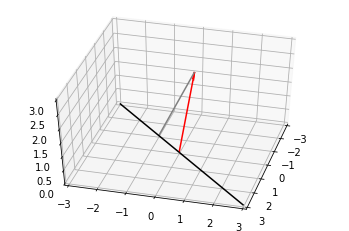

In [16]:
 # We now look at two vectors (2,-1,1) and (1,0,1)
target = np.array([-2,0,2])

u = np.array([[3,3,0],[-3,-3,0]])
# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
X, Y, Z = zip(*u)

print(u @ np.array([[-1],[-1],[1]]))

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'],arrow_length_ratio=0)
plt.quiver(*origin, target[0],target[1],target[2], color = ['red'],arrow_length_ratio=.1)
plt.quiver(target[0],target[1],target[2],1,-1,-2, color = ['gray'],arrow_length_ratio=0)

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(45,15)



Refer to the picture above. The origin is where the red line meets the black line.

The x-y plane in the picture drawn below will stand for the space formed by all 14 features. The line in the x-y plane in the picture below stands for the space formed by all but the $i$'th feature (so the line "represents" a 13-d linear space). The red vector is the target ($y$), and the gray line joins the target to its projection on to the line. 


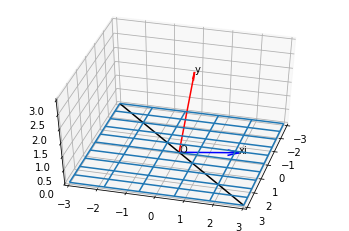

In [31]:
xi = np.array([-.5, 2, 0])
target = np.array([-2,0,2])

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'],arrow_length_ratio=0)
plt.quiver(*origin, target[0],target[1],target[2], color = ['red'],arrow_length_ratio=.1)
plt.quiver(*origin, xi[0],xi[1],xi[2],color=['blue'],arrow_length_ratio=.2)
ax.text(0,0,0, 'O')
ax.text(-.5,2,0, 'xi')
ax.text(-2,0,2,'y')

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])

ax.view_init(45,15)

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
w1,w2 = np.meshgrid(x,y)
plane = np.zeros(w1.shape)
ax.plot_wireframe(w1, w2, plane,rstride=20,cstride=10)


In the picture above, the origin is where the red, blue and black lines intersect. 

The red vector is the target (y) 

The blue vector is the i'th feature. 

The black line stands for the linear space spanned by all features except the i'th one. 

The linear space of all features including the i'th feature is therefore the x-y plane (denoted by the grid above). \

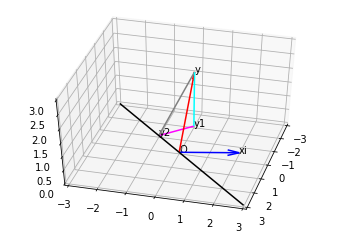

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'],arrow_length_ratio=0)
plt.quiver(*origin, target[0],target[1],target[2], color = ['red'],arrow_length_ratio=.1)
plt.quiver(*origin, xi[0],xi[1],xi[2],color=['blue'],arrow_length_ratio=.2)
plt.quiver(target[0],target[1],target[2],1,-1,-2, color = ['gray'],arrow_length_ratio=0)
plt.quiver(target[0],target[1],target[2],0,0,-2, color = ['cyan'],arrow_length_ratio=0)
plt.quiver(-1,-1,0,-1,1,0, color=['magenta'],arrow_length_ratio =0)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.text(0,0,0, 'O')
ax.text(-.5,2,0, 'xi')
ax.text(-2,0,2,'y')
ax.text(-2,0,0,'y1')
ax.text(-1,-1,0,'y2')

ax.view_init(45,15)
#ax.view_init(90,45)


Refer to the picture above. The origin $O$ is where the red, blue and black lines intersect.

The gray line in the picture above connects the projection of the target 𝐲 to the smaller linear space (the line "represents" the linear space spanned by all 13 features _excluding_ feature i). It meets the smaller linear space (black line) at $y_2$.

The light blue (cyan) line is the projection of the target into the larger linear space (the plane "represents" the linear space spanned by all 14 features, including feature i marked in blue). It meets the larger linear space (the x-y plane) at $y_1$

The pink line connects $y1$ and $y2$, ie the projection onto the line (13-d space) to the projection of the target into the plane (14-d space). 

The pink line, light-blue line and the gray line above form a right angled triangle.



#### Problem 3.1
Show that the pink line has to be perpendicular to the black linear space (the space spanned by the 13 features excluding feature $i$). That is the angle $y_1y_2O$ is a right angle. Namely the projection of $\bf y$ on to the black line is the projection of (the *projection of $\bf y$ onto the plane*). 


Doing ordinary least squares on the target $Y$, $n\times p$ matrix of measurements $X$ yields model coefficients 
$$\hat{\bf w} = (X^TX)^{-1}X^TY,$$
as described above. For simplicity of notation, we drop the hat on $\bf w$ in the rest of this section, writing
$$ {\bf w} = (X^TX)^{-1}X^TY.$$

Let the $i,j$th element of $X$ be $x_{i,j}$. We assume that the noise is Gaussian under the null hypothesis. Namely, under $H_0$, the null hypothesis, we assume that example $k$ as
 $$ y_k = \sum_{j=1\\j\ne i}^{14} x_{kj}\beta_j + \nu_k , \quad 1\le k \le n, $$
where $\nu_k \sim $ Gaussian with mean 0 and variance $\sigma^2$ for an __unknown__ $\sigma$, with $\nu_k$ independent for different values of $k$. Therefore the vector $\bf y$ is a __multivariate Gaussian__. We assume that noise is statistically independent from example to example. Note also that the null hypothesis does __NOT__ assume that $\beta_j$ equals the values $w_j$ we calculated for $j\ne 1$. Note that it does not assume that the signal component $\sum_{j=1\\j\ne i}^{14} \beta_j x_{kj} = {\bf y}_2$ from the picture above. But whatever this point $\sum_{j=1\\j\ne i}^{14} \beta_j x_{kj}$ on the black line is, we treat it as fixed. It will be more convenient to use the matrix notation,
$$ Y = X_{-i}\beta + \nu, $$
where $Y= \begin{bmatrix} y_1\\\vdots\\y_n \end{bmatrix}$, $X_{-i}$ is the $n\times (p-1)$ matrix formed by removing the $i'$th column of the $n\times p$ matrix $X$ and $\nu =\begin{bmatrix} \nu_1\\\vdots\\\nu_n \end{bmatrix}$. 

Because we assumed under the null hypothesis that there is no component of signal perpendicular to the black line, whatever part of the signal does not lie on the black line must be due to the noise term $\nu$. In particular, the pink, gray and light blue lines must all solely be due to noise.
Therefore, we have
$$ {\mathbb E} Y = X_{-i} \beta, $$
and
$$ cov(Y) = {\mathbb E} \bigl[ Y - X_{-1}\beta) (Y - X_{-i} \beta)^T \bigr] = {\mathbb E} \nu \nu^T = \sigma^2 I .$$

### Distribution of $w_i$ under null hypothesis

Recall that the model coefficients ${\bf w} = (X^TX)^{-1} X^T {\bf y}$. Therefore $w_i$, the coefficient we get for feature $i$, is the $i'$th row of $(X^TX)^{-1} X^T$ multiplied with ${\bf y}$. In anticipation of things to come let the $i'$th row of $(X^TX)^{-1} X^T$ be denoted by ${\bf p}_i^T$, so that $$w_i = {\bf p}_i^T {\bf y}$$. 



#### Gaussian Properties

Two minor miracles of Gaussianity come into play here:

1. Any linear combination of a bunch of independent Gaussians is a Gaussian random variable itself. Namely any vector times $\bf y$ is Gaussian. Since $w_i = {\bf p}_i^T Y$, we now know $w_i$, the calculated coefficient is __(univariate) Gaussian distributed__. And since $w_i$ is multivariate Gaussian derived as a linear combination of $Y$, the regression error $Y-X{\bf w}$ is another linear combination of $Y$, and is a __multivariate Gaussian__.

2. Projections of a vector of independent Gaussians into orthogonal spaces are statistically independent. Therefore, the projection of the noise onto the light-blue and the pink lines are (a) Gaussians and (b) statistically independent. 
The projection of noise on to the light blue line is the error vector $Y - X{\bf w}$ of linear regression into all 14 features. We will prove below that the pink line is a vector in the direction of ${\bf p}_i$, the i'th row of $(X^T X)^{-1} X^T$. So the projection of noise in the direction of the pink line is proportional to $w_i$. The error $Y-X{\bf w}$ and the coefficient $w_i$ are therefore independent Gaussians.

#### Problem 3.2
Prove that the line joining $y1$ and $y2$ is parallel to the $i'$th row of $(X^T X)^{-1} X^T$. Hint: this means that the $i'$th row of $(X^T X)^{-1} X^T$ is perpendicular to the black linear space, ie to all columns of $X$ except the $i'$th column, or equivalently $p_i^T X_{-i} = {\bf 0}$.



In [59]:
# Verify the problem statement first. Recall taht the train data in the boston set is train_data
# We will verify that the third row of $(X^T X)^{-1} X^T$ is orthogonal to the linear space formed by all features except the third feature

X = train_data
p3 = (lin.inv(X.T @ X) @ X.T )[2,:]

# Note that p3 is now orthogonal to all columns of X except the third.
print(np.round(X.T @p3,2))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Mean and variance of $w_i$

Back to $w_i$. We already saw from Gaussian property 1 above that $w_i$ was a univariate Gaussian (but we don't know its mean and variance yet). Therefore the mean of $w_i$

$$ {\mathbb E} w_i = {\mathbb E} {\bf p}_i^T {\bf y} = {\mathbb E} {\bf p}_i^T (X_{-i} \beta + \nu) = 0 +{\bf p}_i^T {\mathbb E}\nu = 0.$$

Therefore ${\bf w}_i$ is a zero mean Gaussian. What is its variance? The variance of $w_i$ is ${\mathbb E} w_i^2 $ since $w_i$ has 0 mean. Since $w_i$ is just a number, $w_i= w_i^T$, and therefore the variance of $w_i$ is

$$ {\mathbb E} w_i w_i^T = {\mathbb E} {\bf p}_i^T YY^T { \bf p }_i = {\bf p}_i^T ( \sigma^2I + X_{-i}\beta\beta^TX_{-i}^T ){\bf p}_i = \sigma^2 {\bf p}_i^T {\bf p}_i = \sigma^2 ||{\bf p}_i ||^2 \tag*{(2)}$$

We know ${\bf p}_i$ is in the direction of the pink line, but what is its length? We relate this to one of the coefficients of $(X^TX)^{-1}$ since we would have already computed $(X^TX)^{-1}$. First recall that each row of the product $AB$ is simply a linear combination of the rows of $B$. Therefore will have that ${\bf p}_i^T$, the i'th row of $(X^T X)^{-1} X^T$ is just a linear combination of the rows of $X^T$. The rows of $X^T$ are of course the columns of $X$, or the 14 features we are playing with. 

Let us write the $i,j$'th element of $(X^TX)^{-1}$ as $\alpha_{i,j}$, from which we get

$$ {\bf p}_i^T = \sum_{j=1}^{14} \alpha_{ij} {\bf x}_j^T,\tag*{(1)}$$

where ${\bf x}_j$ are the columns of $X$, or the features of our training data. The transpose in the equation above is to make it into a row vector, since by default we think of features as column vectors (columns of the data matrix).
#### Problem 3.3
Use Equation (1) above to show that ${\bf p}_i^T {\bf p}_i$ is just the coefficient $\alpha_{ii}$ (the $i'$th diagonal entry of $(X^TX)^{-1}$). Hint: multiply both sides of Equation (1) by ${\bf p}_i^T$ on the left and use the hint from Problem 5.


Putting it all together, we therefore have
$$ \textrm{var}(w_i) = {\mathbb E} w_i^2 -0 = \sigma^2 {\bf p}_i^T {\bf p}_i = \sigma^2 \alpha_{ii}. \tag*{(3)}$$





#### Estimating $\sigma$ using the error $Y-X{\bf w}$

Now, we don't know $\sigma^2$. But we want to estimate it, and we want our estimate to be independent of $w_i$. 

We already saw in minor miracle 2. that the error $Y - X{\bf w}$ is multivariate Gaussian vector independent of $w_i$.

The sum of squares of $m$ independent standard (0-mean 1-variance) Gaussian random variables is known as a chi-squared random variable with $m$ degrees of freedom, and it has mean equal to $m$ (sum of variances of each of the $m$ Gaussians). Now $Y-X{\bf w}$ is a $n$ component multivariate Gaussian and $||Y-X{\bf w}||^2$ is the sum of squares of its $n$ components. While the components of $Y-X{\bf w}$ are not independent, it can be rewritten as the sum of $n-14$ independent Gaussian vectors with mean 0 and variance $\sigma^2$. Therefore $\frac{||Y-X{\bf w}||^2}{\sigma^2}$ is a chi-squared random variable with $n-14$ degrees of freedom and therefore has expectation $(n-14)$. Or
$$ \sigma^2 = \frac{{\mathbb E} ||Y-X{\bf w}||^2}{n-14}.$$
Therefore the variance of $w_i$ is
$$ \textrm{var}(w_i) = \frac{{\mathbb E}|| Y-X{\bf w} ||^2\alpha_{ii}}{n-14}.$$
Recall that the square root of the variance is called the __standard deviation__.

We obtain an unbiased __estimate__ of $\sigma^2$ as
$$ \hat\sigma^2 = \frac{||Y-X{\bf w}||^2}{n-14}, $$
and therefore an estimate of the variance of $w_i$ is now from Equation (3),
$$ \hat{\textrm{var}}(w_i) = \frac{|| Y-X{\bf w} ||^2\alpha_{ii}}{n-14}.$$

### Student-t distribution

Since $Y-X{\bf w}$ and $w_i$ are independent, the estimate $\textrm{var}(w_i)$ and $w_i$ are independent as well. Therefore, the ratio of $w_i$ and its standard deviation,
$$\frac{ w_i }{\sqrt{\hat{\textrm{var}}(w_i)}} \tag*{(4)} $$
has for its numerator a Gaussian, and for the denominator, an independent chi-squared random variable with $n-14$ degrees of freedom. The ratio has a pdf that is well known and known as the __Student-t distribution__ (or simply __t-distribution__) with the number of degrees of freedom equal to $n-14$. The cummulative distribution is well tabulated in python/R/any other software, and is plotted below. For large degrees of freedom, this is approximately Gaussian-looking as the pictures below show.

(I - X(X^TX)^{-1}X^T) (X \beta* + \nu) = X\beta* -X\beta* + (I - X(X^TX)^{-1}X^T) \nu

In [1]:
from scipy import stats
x = np.linspace(-4,4,1000)
tvalsdf1 = stats.t.pdf(x,1)
tvalsdf5 = stats.t.pdf(x,5)
tvalsdf100 = stats.t.pdf(x,100)

fig = plt.figure()
plt.plot(x,tvalsdf1)
plt.plot(x,tvalsdf5)
plt.plot(x,tvalsdf100)


NameError: name 'np' is not defined

Now putting it all together, if the value of $w_i$ we observed was purely by chance (null hypothesis), then the quantity in Equation (4) would be t-distributed with $n-14$ degrees of freedom. We observed a value, say -10, for the coefficient. We can therefore figure out the probability that purely by chance, we could see a value whose absolute value is as big as 2---this is the area of the shaded (in red) portion in the figure below. This probability is what you see in the heading P( > |t|).

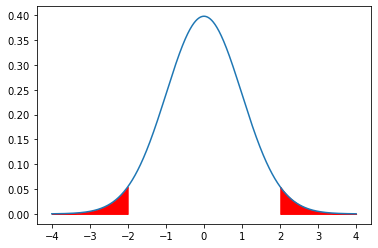

In [61]:
from scipy import stats
x = np.linspace(-4,4,1000)
tvalsdf100 = stats.t.pdf(x,100)

fig = plt.figure()
ax = plt.axes()
plt.plot(x,tvalsdf100)

ax.fill_between(x,tvalsdf100, where=(x<-2),color='red')

ax.fill_between(x,tvalsdf100, where=(x>2),color='red')

### Computing the t-values ourselves.

Let us see if all this makes sense. Below are the statsmodel generated t-values again. We will replicate all the t-values with our own code in this section based on our understanding of the distribution of $w_i$, the estimate of its standard deviation, and the ratio of the two.

In [62]:
import statsmodels.api as sm

train_data_centered = sm.add_constant(train_data)
tvalOLS = sm.OLS(train_values, train_data_centered).fit()

print(tvalOLS.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     77.10
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           6.06e-91
Time:                        00:30:33   Log-Likelihood:                -984.91
No. Observations:                 339   AIC:                             1998.
Df Residuals:                     325   BIC:                             2051.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8589      5.830      5.636      0.0

And here is what we compute using the reasoning above (a very small amount of code for a lot of reasoning!)

In [63]:
n,m = train_data.shape

X = np.hstack((np.ones([n,1]),train_data))
y = train_values
reg = LinearRegression(fit_intercept=False).fit(X,y)

error = reg.predict(X)-y

sse = np.dot(error,error)
alphaii = lin.inv( X.T @ X).diagonal()
varmatrix = sse * alphaii / (n-14)
stderr = np.sqrt(varmatrix)
tvals = reg.coef_/ stderr
pvals =[ 2*(1-stats.t.cdf(np.abs(x),(n-14))) for x in tvals]

table = pd.DataFrame()
table['coef'],table['stderr'], table['t-values'], table['P(>|t|)'] = [np.round(reg.coef_,4),np.round(stderr,3),np.round(tvals,3),np.round(pvals,3)]

print(table)

       coef  stderr  t-values  P(>|t|)
0   32.8589   5.830     5.636    0.000
1   -0.1564   0.039    -4.022    0.000
2    0.0385   0.016     2.371    0.018
3   -0.0251   0.071    -0.352    0.725
4    0.7864   1.047     0.751    0.453
5  -12.9469   4.594    -2.818    0.005
6    4.0027   0.478     8.380    0.000
7   -0.0116   0.015    -0.780    0.436
8   -1.3683   0.238    -5.750    0.000
9    0.3418   0.084     4.072    0.000
10  -0.0135   0.005    -2.877    0.004
11  -0.9889   0.152    -6.497    0.000
12   0.0121   0.003     3.762    0.000
13  -0.4726   0.060    -7.922    0.000


Of course, all the above are perfect matches! 

You get linear regression perfectly when you understand how we generated the table below.